# 과적합, 분산 편향 트레이드오프, 교차 검증

In [2]:
#필요한 라이브러리 임포트

import numpy as np
import pandas as pd
from eval_score_function import eval_score

# 교차검증

## 1. 사이킷런의 model_selection의 KFold()를 사용하는 경우(For loop 사용)

#### 폴드를 분리할 객체 생성

In [3]:
from sklearn.model_selection import KFold

#### 데이터를 준비하고 회귀 모형 객체를 생성

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

diab = load_diabetes()

X = diab.data
y = diab.target
# X,y

In [8]:
len(X)

442

#### split()함수를 호출하여 폴드별로 분리될 행 인덱스 세트를 구함

In [9]:
kfold = KFold(5) # k폴드를 5개로 할거야
list(kfold.split(X)) # 5개로 쫘라락 나눠짐 

[(array([ 89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
         102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
         115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
         128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
         141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
         167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
         180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
         193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
         206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
         219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
         232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
         245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
         258, 259, 260, 261, 262, 263,

kfold는 속성을 출력하는 것이 아니라 인덱스 번호만 갖고 있는 것임!!

데이터를 전부 다 굳이 kfold 에 올릴 필요가 없음 

학습은 사람이 직접 코드를 써서 하는 거임


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

r2_scores = []
lr = LinearRegression()

for train_idx, test_idx in kfold.split(X):
    # 2번 라운드의 테스트와 스플릿으로 두면 되는 것임
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    reg = lr.fit(X_train,y_train)
    y_pred = reg.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


In [12]:
r2_scores #5개의 평균을 냄

[0.4295561538258379,
 0.5225993866099365,
 0.4826805413452825,
 0.42649776111040205,
 0.5502483366517519]

In [15]:
import numpy as np

for i, r2 in enumerate(r2_scores):
    print(i+1, f'- R2 = {r2:.3f}')

print(f"average: {np.round(np.mean(r2_scores),3)}")

1 - R2 = 0.430
2 - R2 = 0.523
3 - R2 = 0.483
4 - R2 = 0.426
5 - R2 = 0.550
average: 0.482


## 2. 사이킷런의 cross_val_score 함수를 사용하여 K폴드 교차 검증 수행 without shuffling:
- for loop 필요 없음

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

diab=load_diabetes()
X = diab.data
y = diab.target

lr = LinearRegression()

np.round(np.mean(cross_val_score(lr, X,y, cv=5)),3)

0.482

In [18]:
from sklearn.datasets import load_iris
import pandas as pd

iris  = load_iris()
X = iris.data
y = iris.target

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['kind'] = iris.target
iris_df
# 이렇게 하면 문제는?
# y를 나눌때 문제가 됨 
# 왜?
# kind가 정렬이 되어 있음 -> 첫 라운드에서 다 틀리고, 두, 세번째 라운드에서 다 틀릴 것임  
# 그래서 이런 데이터는 셔플해줘야 함 
# 세 종류가 동일한 분포로 되어있도록 하려면 원래의 학습 데이터의 분포가 33.3 테스트 데이터도 33.3이 되어야 함!!
# 편중 되어있는 데이터를 셔플하고, fold하기 전에 분포도 맞춰놔야 하는 것임


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kind
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 3. 사이킷런의 cross_val_score 함수를 사용하여 K폴드 교차 검증 수행 with shuffling

In [21]:
#셔플을 하자

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

diab=load_diabetes()
X = diab.data
y = diab.target

# kfold = KFold(5, shuffle=True, stratify= True) # 셔플 옵션 on, 분포 옵션 on, stratify는 '분류'일때만 쓸 수 있음 -> 그래서 여기서 못씀 iris 에서 써야함


kfold = KFold(5, shuffle=True, random_state= 29) # 셔플 옵션 on, stratify는 '분류'일때만 쓸 수 있음 

lr = LinearRegression()

np.round(np.mean(cross_val_score(lr, X,y, cv=kfold)),3)

0.489

## 과제: 올린다음 이야기할 예정 

250 자료 참고해서 해보기 

# 규제가 있는 선형회귀 - 릿지, 라쏘, 엘라스틱넷 회귀

#### 규제가 있는 모델 구축 - 당뇨병 데이터세트
#### 1. 데이터 전처리
-> 스케일링
#### 2. Ridge, Lasso, Elasticnet regression 구축: 회귀 계수 확인, 하이퍼 파라미터 탐색
-> 하이퍼 파라미터 찾기! 우리는 a만 지정하고 학습은 니가해~ 하고 맡길 수 있음 그게 라쏘CV임 
#### 3. 교차 검증으로 최적의 하이퍼파라미터 탐색: LassoCV()

In [22]:
# 관련 라이브러리 및 모듈 Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
import warnings
warnings.filterwarnings(action='ignore') # 워닝 뜨는거 안뜨게 하기 

In [25]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from eval_score_function import eval_score


In [27]:
def evaluate_score(y_test, y_pred) -> tuple():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.square(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"mse - {mse:.3f}")
    print(f"rmse - {rmse:.3f}")
    print(f"R2 - {r2:.3f}")

    return (mse, rmse, r2)

In [28]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [29]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# 0. 데이터 수집, 탐색, 준비

#### 데이터프레임 변환

데이터프레임 변환

In [30]:
diab_df = pd.DataFrame(data=diab.data, columns=diab.feature_names)
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [32]:
# 누락치와 데이터 타입 확인 
diab_df.isnull().sum() # 이렇게 결측치를 찾는다 

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [33]:
# 결측치 확인하는 다른 방법
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [ ]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# diab_df생성
# diab_df.head() 데이터 5개 확인



In [ ]:
# 누락치 확인,  data type 확인 ->  isnull().sum(), target에 결측값이 있으면 해당 관측치 제거

In [34]:
# X(독립변수), Y(종속변수) 분할
X = diab.data
y = diab.target

In [75]:
# 학습용, 평가용 데이터 분리
#testsize = 0.3 random_state =42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


데이터 이제 준비 끝!

# 모델별 계수변화, 알파별 계수 비교 데이터프레임(comp_df)

a라는 하이퍼 파라미터를 변화시켜서 규제 강도를 조절하고 계수가 어떻게 변하는지 확인해보자 

그걸 저장할 df하나 만들자 

In [37]:
#각 모델별 계수로 이루어진 데이터프레임 준비
comp_df = pd.DataFrame(index=diab.feature_names+["R2 score"])
comp_df
#계수, 회귀계수 , 평가도 볼건데 R2만 일단 확인해보자 

""
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


In [ ]:
#각 모델별, 규제강도별 평가지표 저장


# 1. 규제가 없는 선형모델

비교 대상이 될 규제 없는 선형 모델을 만들어보자 

In [49]:
#모델 구축 및 학습
model_LR = LinearRegression()

model_LR.fit(X_train, y_train)
#모델 평가
y_train = model_LR.predict(X_test)
evaluate_score(y_test, y_train)

# 회귀 계수 확인


mse - 2821.751
rmse - 7962278.599
R2 - 0.477


(2821.7509810013107, 7962278.5987818595, 0.4772897164322617)

In [50]:
LR_coef = pd.Series(model_LR.coef_, index = diab.feature_names)
print(LR_coef)

age     29.254013
sex   -261.706469
bmi    546.299723
bp     388.398341
s1    -901.959668
s2     506.763241
s3     121.154351
s4     288.035267
s5     659.268951
s6      41.376701
dtype: float64


<BarContainer object of 10 artists>

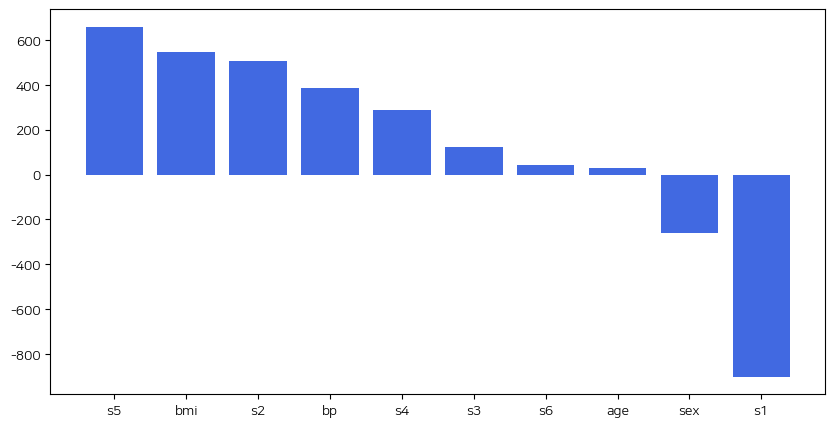

In [56]:

coef = LR_coef.sort_values(ascending=False)

#시각화
import matplotlib as mpl
mpl.rc('axes', unicode_minus=False) 
plt.figure(figsize=(10, 5))
plt.bar(coef.index, coef.values, color ="royalblue")

=====
s1     901.959668
s5     659.268951
bmi    546.299723
s2     506.763241
bp     388.398341
s4     288.035267
sex    261.706469
s3     121.154351
s6      41.376701
age     29.254013
dtype: float64


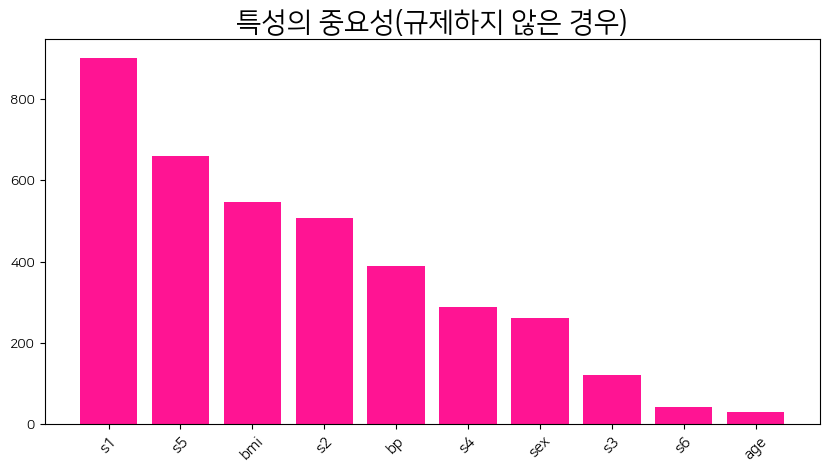

In [67]:
# 아니면 절대값을 씌워서 영향을 얼마나 주는지를 보자 
coef = np.abs(LR_coef).sort_values(ascending = False)
print("=====")
print(coef)
plt.figure(figsize=(10, 5))
plt.title("특성의 중요성(규제하지 않은 경우)", fontsize = 20)
#plt.title ("feature importance of coefficients without Regulization")
plt.bar(coef.index, coef.values, color ="deeppink")
plt.xticks(coef.index, rotation =45 , fontsize =11);


- 계수값 시각화

In [ ]:


# 시각화


In [69]:
# 모델별 비교 데이터프레임 열 추가
#이 결과를 comp_df에 저장하자 
comp_df["LR"] = np.append(model_LR.coef_, r2)

In [70]:
comp_df

,LR
age,29.254013
sex,-261.706469
bmi,546.299723
bp,388.398341
s1,-901.959668
s2,506.763241
s3,121.154351
s4,288.035267
s5,659.268951
s6,41.376701


# 1. 릿지 모델

In [76]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge() #model_Ridge = Ridge(alpha=1)과 같은 소리임  
model_Ridge.fit(X_train, y_train)
# 이렇게 학습이 끝나나? 
# 규제 강도 주지 않으면 디폴트로 1.0을 준다 

Ridge()

In [77]:
# 릿지 선형회귀 모델 평가: model_Ridge1, alpha=1
y_pred = model_Ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
# a=1일때 회귀 계수 확인
coef = model_Ridge.coef_
coef

array([  45.05421022,  -71.94739737,  280.71625182,  195.21266175,
         -2.22930269,  -17.54079744, -148.68886188,  120.46723979,
        198.61440137,  106.93469215])

In [ ]:
# 선형 모델 평가


#a = 1 릿지 모델 회귀 계수


- 계수값 시각화

bmi    280.716252
s5     198.614401
bp     195.212662
s3     148.688862
s4     120.467240
s6     106.934692
sex     71.947397
age     45.054210
s2      17.540797
s1       2.229303
dtype: float64


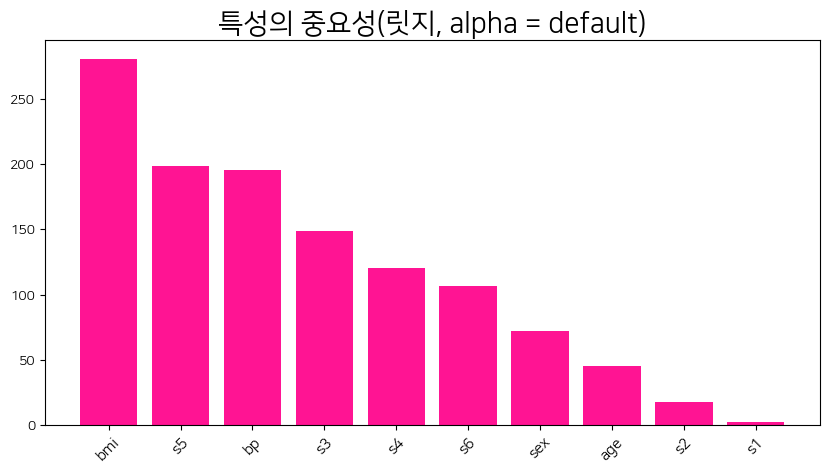

In [81]:
coef = pd.Series(np.abs(model_Ridge.coef_), index = diab.feature_names)
coef = coef.sort_values(ascending= False)

# 시각화
print(coef)
plt.figure(figsize=(10, 5))
plt.title("특성의 중요성(릿지, alpha = default)", fontsize = 20)
#plt.title ("feature importance of coefficients without Regulization")
plt.bar(coef.index, coef.values, color ="deeppink")
plt.xticks(coef.index, rotation =45 , fontsize =11);

#회귀계수가 미치는 영향이 작아졌구나! 

In [82]:
coef =pd.Series(model_Ridge.coef_, index= diab.feature_names)
coef

age     45.054210
sex    -71.947397
bmi    280.716252
bp     195.212662
s1      -2.229303
s2     -17.540797
s3    -148.688862
s4     120.467240
s5     198.614401
s6     106.934692
dtype: float64

In [87]:
# alpha_list=[0.01, 1, 10, 100]인 경우
alpha_list = [0.01, 1, 10, 100] # 알파 값 조정
for each_alpha in alpha_list:
    model_Ridge = Ridge(alpha=each_alpha)
    #선형회귀 수행: 학습
    model_Ridge.fit(X_train, y_train)
    y_pred = model_Ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    #4쌍이 나올거임 
    col_name = f'Ridge(alpha = {each_alpha:.2f})'
    comp_df[col_name] = np.append(model_Ridge.coef_, r2)

In [88]:
comp_df

,LR,Ridge(alpha = 0.01),Ridge(alpha = 1.00),Ridge(alpha = 10.00),Ridge(alpha = 100.00)
age,29.254013,34.167328,45.054210,16.230889,2.072848
sex,-261.706469,-254.043316,-71.947397,-2.961367,-0.003808
bmi,546.299723,550.844882,280.716252,59.524160,6.899915
bp,388.398341,379.126708,195.212662,43.421300,5.085100
s1,-901.959668,-404.253263,-2.229303,13.875073,2.069660
s2,506.763241,123.029219,-17.540797,10.865267,1.743748
s3,121.154351,-99.041674,-148.688862,-37.495847,-4.508876
s4,288.035267,215.032624,120.467240,38.728538,4.902421
s5,659.268951,463.842634,198.614401,49.224746,5.926496
s6,41.376701,50.351490,106.934692,34.737987,4.328698


릿지 규제는 원래의 손실함수에 규제를 하는 것인데 
가중치의 제곱을 추가한 것인데 
a가 매우 커지면 전채 비용함수에서 mse는 영향을 못미치고 가중치가 0에 가까워진다 ->a 커지면 커질수록 계수가 작아진다 
-

# 2. 라쏘 모델

In [89]:
from sklearn.linear_model import Lasso

# alpha = 1 이게 디폴트임 
model_Lasso = Lasso(alpha=1)
model_Lasso.fit(X_train, y_train)


Lasso(alpha=1)

In [91]:
# 라쏘 선형회귀 모델 평가(alpha=1)
# 선형 모델 평가
y_pred = model_Lasso.predict(X_test)
r2= r2_score (y_test, y_pred)
print(r2)
#a = 1 라쏘 모델 회귀 계수

Lasso_coef = pd.Series(model_Lasso.coef_, index = diab.feature_names)
Lasso_coef
#0인 애들이 수두룩해짐 즉, 이 계수가 미치는 영향을 빼버렸다는 것임 
# 종속변수에게 영향을 덜 미칠 것이라는 것을 볼 수 있음 
# 다중공선성 -> 1. 다중계수의 상관관계 보세요 
# 2. 라쏘 모델 돌려보세요 
# 특성 선택을 하는 데에 도움을 주기도 한다 

0.36189802861957876


age      0.000000
sex     -0.000000
bmi    443.703388
bp      51.601094
s1       0.000000
s2       0.000000
s3      -0.000000
s4       0.000000
s5     201.966478
s6       0.000000
dtype: float64

- 계수 시각화

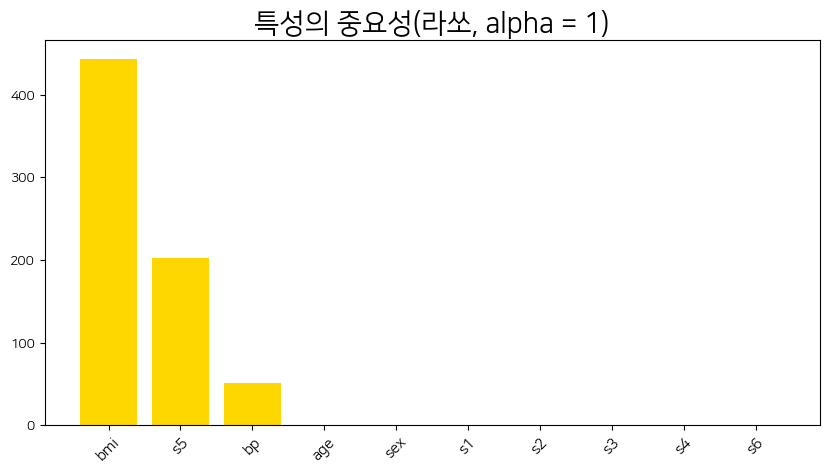

In [96]:
coef = np.abs(Lasso_coef)
coef = pd.Series(coef, index = diab.feature_names).sort_values(ascending= False)
# 시각화
plt.figure(figsize=(10, 5))
plt.title("특성의 중요성(라쏘, alpha = 1)", fontsize = 20)
#plt.title ("feature importance of coefficients without Regulization")
plt.bar(coef.index, coef.values, color ="gold")
plt.xticks(coef.index, rotation =45 , fontsize =11);

In [97]:
# alpha_list=[0.01, 1, 10, 100]인 경우
alpha_list = [0.01, 1, 10, 100] # 알파 값 조정
for each_alpha in alpha_list:
    model_Lasso = Lasso(alpha=each_alpha)
    #선형회귀 수행: 학습
    model_Lasso.fit(X_train, y_train)
    y_pred = model_Lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    #4쌍이 나올거임 
    col_name = f'Lasso(alpha = {each_alpha:.2f})'
    comp_df[col_name] = np.append(model_Lasso.coef_, r2)

In [98]:
comp_df

,LR,Ridge(alpha = 0.01),Ridge(alpha = 1.00),Ridge(alpha = 10.00),Ridge(alpha = 100.00),Lasso(alpha = 0.01),Lasso(alpha = 1.00),Lasso(alpha = 10.00),Lasso(alpha = 100.00)
age,29.254013,34.167328,45.054210,16.230889,2.072848,28.246364,0.000000,0.000000,0.000000
sex,-261.706469,-254.043316,-71.947397,-2.961367,-0.003808,-250.819184,-0.000000,0.000000,0.000000
bmi,546.299723,550.844882,280.716252,59.524160,6.899915,556.215874,443.703388,0.000000,0.000000
bp,388.398341,379.126708,195.212662,43.421300,5.085100,380.659502,51.601094,0.000000,0.000000
s1,-901.959668,-404.253263,-2.229303,13.875073,2.069660,-468.739540,0.000000,0.000000,0.000000
s2,506.763241,123.029219,-17.540797,10.865267,1.743748,166.993417,0.000000,0.000000,0.000000
s3,121.154351,-99.041674,-148.688862,-37.495847,-4.508876,-60.219459,-0.000000,-0.000000,-0.000000
s4,288.035267,215.032624,120.467240,38.728538,4.902421,230.916253,0.000000,0.000000,0.000000
s5,659.268951,463.842634,198.614401,49.224746,5.926496,492.634358,201.966478,0.000000,0.000000
s6,41.376701,50.351490,106.934692,34.737987,4.328698,43.969346,0.000000,0.000000,0.000000


# 3. 엘라스틱넷 모델

In [99]:
# 모델 구축 및 학습(alpha=1, l1_ratio=0.5)
from sklearn.linear_model import ElasticNet

alpha_list = [0.01, 1, 10, 100]
#어떤 규제를 쓰는지에 따라서 
# 라쏘가 더 강하고 릿지는 좀 덜하하고, 엘라스틱넷은 그 중간임 
# for each_alpha in alpha_list:
#     model_ElasticNet = ElasticNet(alpha=1, l1_ratio=0.5)
#     model_ElasticNet.fit(X_train, y_train)
#     y_pred = model_ElasticNet.predict(X_test)
#     r2 = r2_score(y_test, y_pred)
#     #4쌍이 나올거임 
#     col_name = f'ElasticNet (alpha = {each_alpha:.2f})'
#     comp_df[col_name] = np.append(model_ElasticNet.coef_, r2)

model_ElasticNet = ElasticNet(alpha=1, l1_ratio=0.5)
model_ElasticNet.fit(X_train, y_train)
y_pred = model_ElasticNet.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [101]:
#모델 평가 및 회귀 계수 확인
# 엘라스틱넷 선형회귀 모델 평가(alpha=1, L1_ratio=0.5)
# 선형 모델 평가


#a = 1 엘라스틱넷 모델 회귀 계수
Elastic_coef = pd.Series(model_ElasticNet.coef_, index = diab.feature_names)
Elastic_coef

age    0.367567
sex    0.000000
bmi    3.512046
bp     2.328646
s1     0.380194
s2     0.168337
s3    -1.955958
s4     2.228128
s5     2.887428
s6     1.846225
dtype: float64

- 계수 시각화

In [ ]:


# 시각화


In [102]:
# alpha_list=[0.01, 1, 10, 100]인 경우, l1_ratio=0.5 

alpha_list = [0.01, 1, 10, 100]
#어떤 규제를 쓰는지에 따라서 
# 라쏘가 더 강하고 릿지는 좀 덜하하고, 엘라스틱넷은 그 중간임 
for each_alpha in alpha_list:
    model_ElasticNet = ElasticNet(alpha=1, l1_ratio=0.5)
    model_ElasticNet.fit(X_train, y_train)
    y_pred = model_ElasticNet.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    #4쌍이 나올거임 
    col_name = f'ElasticNet (alpha = {each_alpha:.2f})'
    comp_df[col_name] = np.append(model_ElasticNet.coef_, r2)

In [103]:
comp_df

,LR,Ridge(alpha = 0.01),Ridge(alpha = 1.00),Ridge(alpha = 10.00),Ridge(alpha = 100.00),Lasso(alpha = 0.01),Lasso(alpha = 1.00),Lasso(alpha = 10.00),Lasso(alpha = 100.00),ElasticNet (alpha = 0.01),ElasticNet (alpha = 1.00),ElasticNet (alpha = 10.00),ElasticNet (alpha = 100.00)
age,29.254013,34.167328,45.054210,16.230889,2.072848,28.246364,0.000000,0.000000,0.000000,0.367567,0.367567,0.367567,0.367567
sex,-261.706469,-254.043316,-71.947397,-2.961367,-0.003808,-250.819184,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bmi,546.299723,550.844882,280.716252,59.524160,6.899915,556.215874,443.703388,0.000000,0.000000,3.512046,3.512046,3.512046,3.512046
bp,388.398341,379.126708,195.212662,43.421300,5.085100,380.659502,51.601094,0.000000,0.000000,2.328646,2.328646,2.328646,2.328646
s1,-901.959668,-404.253263,-2.229303,13.875073,2.069660,-468.739540,0.000000,0.000000,0.000000,0.380194,0.380194,0.380194,0.380194
s2,506.763241,123.029219,-17.540797,10.865267,1.743748,166.993417,0.000000,0.000000,0.000000,0.168337,0.168337,0.168337,0.168337
s3,121.154351,-99.041674,-148.688862,-37.495847,-4.508876,-60.219459,-0.000000,-0.000000,-0.000000,-1.955958,-1.955958,-1.955958,-1.955958
s4,288.035267,215.032624,120.467240,38.728538,4.902421,230.916253,0.000000,0.000000,0.000000,2.228128,2.228128,2.228128,2.228128
s5,659.268951,463.842634,198.614401,49.224746,5.926496,492.634358,201.966478,0.000000,0.000000,2.887428,2.887428,2.887428,2.887428
s6,41.376701,50.351490,106.934692,34.737987,4.328698,43.969346,0.000000,0.000000,0.000000,1.846225,1.846225,1.846225,1.846225


### LassoCV() : k-폴드 교차 검증으로 최적의 Lasso 모델 하이퍼파라미터 alpha 찾기

In [104]:
#LassoCV()에 필요한 매개변수 설정
#0.01 ~ 9.91 까지 alpha_list  생성


cv = 5 #cross validation 을 몇개로 할 것인가 ? linear_model.LassoCV
alpha_list = np.arange(0.01,10, 0.01) # alpha 1000개
max_iter= 100

In [105]:
from sklearn.linear_model import LassoCV
# alphas => 알파 리스트를 할당하면 됨
model_LassoCV = LassoCV(alphas=alpha_list, cv=cv, max_iter=1000, n_jobs=-1, random_state=42)#n_jobs는 integer, 교차검증 중 사용할 cpu 수 , 최대한 많이 쓰고 싶으면 -1
#모델에 대한 객체 생성임

- 모델 학습
model_LassoCV

In [106]:
model_LassoCV.fit(X_train, y_train)
#학습끝

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67...
       9.25, 9.26, 9.27, 9.28, 9.29, 9.3 , 9.31, 9.32, 9.33, 9.34, 9.35,
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=5, n_jobs=-1, random_state=42)

In [108]:
# 언제 점수가 가장 좋은지 알고싶다면?
# attribute에 alpha_ -> cross validation 중 가장 뛰어난 score를 기록한 
model_LassoCV.alpha_
# 알파의 영역을 정하는 것이 데이터 분석가의 영역 

0.01

In [ ]:
best_model = Lasso(alpha=0.01)
best_model.fit(X_train, y_train)

best_model.predict(X_test)#얘가 좋은 하이퍼 파라미터 튜닝 값을 알고있음 

#근데 사이킷런이 이미 lassoCV에서 연산 또 안하게 best_parameter가 있어서 안돌리도 됨
# 다시 학습해도 되지만, alpha가 나왓끼 때문에

In [109]:
y_pred = model_LassoCV.predict(X_test)
r2_score(y_test, y_pred)

0.47871428812904415

## GridSearchCV

In [133]:
# 라쏘로 하기 어려울 때 쓰는 것
from sklearn.model_selection import GridSearchCV

model = ElasticNet()
param_grid = {
    'alpha': [0.01,1, 10, 100],
    'l1_ratio':[0.1, 0.3, 0.6, 0.9]
} # 알파 4개 l1_ratio 4개 cv 3개니까 48번 연산해야 함 
cv = 3 
grid = GridSearchCV(model,param_grid=param_grid, cv = cv)# 모델,  param_grid하이퍼 파라미터(딕셔너리), scoring(평가 지표 mse를 적거나 ), refit(베스트 파라미터로 할 것인가? default= true) estimator = 모델, n_jobs(씨퓨 수)


In [134]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 1, 10, 100],
                         'l1_ratio': [0.1, 0.3, 0.6, 0.9]})

In [135]:
# 베스트 모델이 바로 됐으므로 predict하면 됨
y_pred = grid.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.47378958651114567


In [136]:
grid.best_params_ #언제 가장 결과가 좋았는지 알려줌 

{'alpha': 0.01, 'l1_ratio': 0.9}

In [137]:
# cv 결과도 있으니까 확인해봐
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001034,0.000340,0.000774,5.263527e-04,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.263839,0.345717,0.220628,0.276728,0.051874,4
1,0.000339,0.000061,0.000135,1.223624e-05,0.01,0.3,"{'alpha': 0.01, 'l1_ratio': 0.3}",0.295161,0.383803,0.247244,0.308736,0.056570,3
2,0.000534,0.000337,0.000138,2.005584e-05,0.01,0.6,"{'alpha': 0.01, 'l1_ratio': 0.6}",0.357773,0.458940,0.297350,0.371355,0.066664,2
3,0.000275,0.000007,0.000115,2.464940e-06,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",0.448660,0.559716,0.354858,0.454411,0.083732,1
4,0.000254,0.000002,0.000113,5.150430e-07,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-0.036596,0.006173,-0.054330,-0.028251,0.025395,8
5,0.000255,0.000001,0.000113,9.798072e-07,1,0.3,"{'alpha': 1, 'l1_ratio': 0.3}",-0.035813,0.006724,-0.053471,-0.027520,0.025265,7
6,0.000260,0.000005,0.000114,7.867412e-07,1,0.6,"{'alpha': 1, 'l1_ratio': 0.6}",-0.033089,0.008825,-0.050609,-0.024958,0.024936,6
7,0.000249,0.000002,0.000111,5.619580e-07,1,0.9,"{'alpha': 1, 'l1_ratio': 0.9}",-0.014408,0.024254,-0.031096,-0.007083,0.023182,5
8,0.000248,0.000002,0.000113,4.064786e-06,10,0.1,"{'alpha': 10, 'l1_ratio': 0.1}",-0.043113,-0.000548,-0.060565,-0.034742,0.025207,9
9,0.000254,0.000007,0.000113,8.778064e-07,10,0.3,"{'alpha': 10, 'l1_ratio': 0.3}",-0.043425,-0.000801,-0.060893,-0.035039,0.025239,10


In [141]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,mean_test_score,rank_test_score
3,0.454411,1
2,0.371355,2
1,0.308736,3
0,0.276728,4
7,-0.007083,5
6,-0.024958,6
5,-0.027520,7
4,-0.028251,8
8,-0.034742,9
9,-0.035039,10


## [응용] 보스턴 주택가격 데이터를 활용하여, 규제가 없을때, 리지, 라쏘, 엘라스틱넷 선형회귀를 수행하고 각각의 회귀계수 및 예측 성능을 비교하라
테스트 사이즈:0.3
random_state=42


# 로지스틱 회귀

회귀라고 쓰고 분류라고 읽는..

#### 시그모이드 함수

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

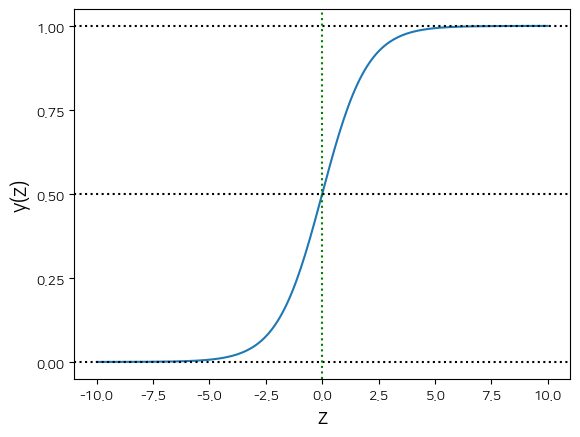

In [143]:
#### 
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
y = sigmoid(z)

plt.plot(z, y)
plt.axhline(y=0, linestyle=':', color='k')
plt.axhline(y=0.5, linestyle=':', color='k')
plt.axhline(y=1, linestyle=':', color='k')
plt.axvline(x=0, linestyle=':', color='g')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1])
plt.xlabel('z', fontsize=15)
plt.ylabel('y(z)', fontsize=15);

# 1. Logistic Regression : 악성종양 판단, 2진 분류

#### 1. 데이터 수집하기

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

In [3]:
b_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### 2. 데이터 탐색하기

In [5]:
b_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
b_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# malignant array number 0
# benign number 1
# 어떤 것을 1로 잡아야하는 지를 
# ex)좋은 댓글 : 좋은 댓글이 1, 악의적인 댓글이 1
# benign을 찾고 싶었나보지 

In [11]:
#데이터프레임으로 전환하고, 타겟(class) 추가
b_cancer_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
b_cancer_df['diagnosis'] = b_cancer.target
b_cancer_df.info() #마지막 30번이 타겟 데이터임 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
# 타겟 데이터 분포가 알고싶다!

b_cancer_df['diagnosis'].value_counts()
#benign한테 1을 붙인 데이터 

1    357
0    212
Name: diagnosis, dtype: int64

#### 데이터 준비, 분할 및 표준화(스케일링)하기

In [17]:
from sklearn.model_selection import train_test_split

X = b_cancer.data
y = b_cancer.target

X.shape# 형태를 보는 property

(569, 30)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [20]:
# 스케일링 전 X_train
# 스케일링을 하기 전에 데이터 minmaxscale을 확인해보기 
pd.DataFrame(X_train).describe() #스케일 차이 많이 나는구나! 라는 것을 보고 스케일 할 것을 결정

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.185500,19.192839,92.335503,661.859045,0.096475,0.104080,0.088794,0.049479,0.180698,0.062646,...,16.359621,25.534523,107.736030,894.246985,0.132529,0.253369,0.268531,0.115221,0.289187,0.083718
std,3.598618,4.190476,24.769334,366.558262,0.013916,0.051031,0.078154,0.039216,0.028057,0.006861,...,4.965170,6.147466,34.460647,597.853882,0.022989,0.153653,0.193250,0.065688,0.063439,0.017957
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.032500,75.310000,420.350000,0.086740,0.066805,0.030385,0.020710,0.161525,0.057685,...,13.052500,20.865000,84.122500,516.425000,0.116300,0.148600,0.119100,0.065320,0.247850,0.071462
50%,13.310000,18.725000,86.140000,548.450000,0.096035,0.094035,0.062650,0.033870,0.179150,0.061715,...,14.915000,25.155000,97.455000,682.000000,0.132250,0.216000,0.229850,0.098855,0.280950,0.080075
75%,15.772500,21.597500,104.475000,779.125000,0.105400,0.128750,0.128775,0.075022,0.195400,0.065735,...,19.005000,29.452500,125.775000,1093.250000,0.145275,0.328975,0.378750,0.161300,0.318275,0.091853
max,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.105000,0.290300,0.663800,0.207500


In [21]:
# 스케일링 후 X_train_scaled(평균, 표준편차))
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaeld = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
pd.options.display.float_format = '{:.3f}'.format
pd.DataFrame(X_train_scaeld).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,...,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,...,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.005,-2.266,-1.962,-1.416,-3.155,-1.662,-1.138,-1.263,-2.666,-1.851,...,-1.700,-2.201,-1.666,-1.187,-2.672,-1.473,-1.391,-1.756,-2.094,-1.599
25%,-0.689,-0.755,-0.688,-0.660,-0.700,-0.731,-0.748,-0.735,-0.684,-0.724,...,-0.667,-0.761,-0.686,-0.633,-0.707,-0.683,-0.774,-0.761,-0.652,-0.683
50%,-0.244,-0.112,-0.250,-0.310,-0.032,-0.197,-0.335,-0.399,-0.055,-0.136,...,-0.291,-0.062,-0.299,-0.355,-0.012,-0.244,-0.200,-0.249,-0.130,-0.203
75%,0.442,0.575,0.491,0.320,0.642,0.484,0.512,0.652,0.525,0.451,...,0.533,0.638,0.524,0.333,0.555,0.493,0.571,0.702,0.459,0.454
max,3.874,3.493,3.887,5.024,3.470,4.068,4.330,3.874,4.400,5.077,...,3.969,3.910,4.168,5.627,3.923,5.243,4.334,2.669,5.912,6.902


#### 로지스틱 모델 구축

In [24]:
from sklearn.linear_model import LogisticRegression

In [27]:
#1)모델 생성
reg = LogisticRegression()

#2) 모델 훈련, 데이터 학습
reg.fit(X_train_scaeld, y_train)

#3) 평가 데이터에 대한 예측 수행
y_pred = reg.predict(X_test_scaled)
y_pred # 두 번째 결과값만 보여주는 것처럼 보임   #확률값도 볼 수 있다!

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [29]:
# 확률 ㅇㄷ?
np.set_printoptions(suppress=True)
reg.predict_proba(X_test_scaled)
# 해석해보자 


array([[0.99860254, 0.00139746],
       [0.04003841, 0.95996159],
       [0.00136872, 0.99863128],
       [0.01038683, 0.98961317],
       [0.000293  , 0.999707  ],
       [0.00595696, 0.99404304],
       [0.00017142, 0.99982858],
       [0.00172762, 0.99827238],
       [0.00008372, 0.99991628],
       [0.00000233, 0.99999767],
       [0.19447641, 0.80552359],
       [0.07446842, 0.92553158],
       [0.00001664, 0.99998336],
       [0.46612935, 0.53387065],
       [0.41334862, 0.58665138],
       [0.99582419, 0.00417581],
       [0.00607554, 0.99392446],
       [0.99999531, 0.00000469],
       [0.99990375, 0.00009625],
       [1.        , 0.        ],
       [0.9984793 , 0.0015207 ],
       [0.97978704, 0.02021296],
       [0.01999415, 0.98000585],
       [0.00126674, 0.99873326],
       [0.99909784, 0.00090216],
       [0.00078892, 0.99921108],
       [0.00005928, 0.99994072],
       [0.97233473, 0.02766527],
       [0.00174188, 0.99825812],
       [0.99999628, 0.00000372],
       [0.

171개인데, 0~1 사이 어떤 숫자 나오는데, 얘네들은 true가 될 확률! 

1-r, r이 출력된 것임 

임계치 = 0.5

분류의 성능지표는 오차행렬로 함


#### 생성한 모델 성능 지표 확인하기

In [30]:
#오차행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) #이것을 반드시 해결할 수 있어야 함 

array([[ 60,   3],
       [  1, 107]])

In [34]:
#정확도, 정밀도, 재현율 지표확인 -> 이거 다시 공부하기 
from sklearn.metrics import accuracy_score, recall_score, precision_score

acc = accuracy_score(y_test, y_pred)

prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(acc,prec, recall)

0.9766081871345029 0.9727272727272728 0.9907407407407407


In [33]:
recall_score(y_test, y_pred)

0.9907407407407407

In [31]:
107/108

0.9907407407407407

In [36]:
reg.predict_proba(X_test_scaled)

array([0.00139746, 0.95996159, 0.99863128, 0.98961317, 0.999707  ,
       0.99404304, 0.99982858, 0.99827238, 0.99991628, 0.99999767,
       0.80552359, 0.92553158, 0.99998336, 0.53387065, 0.58665138,
       0.00417581, 0.99392446, 0.00000469, 0.00009625, 0.        ,
       0.0015207 , 0.02021296, 0.98000585, 0.99873326, 0.00090216,
       0.99921108, 0.99994072, 0.02766527, 0.99825812, 0.00000372,
       0.99992986, 0.00007903, 0.85569468, 0.00440336, 0.99999498,
       0.00255095, 0.97673909, 0.00069982, 0.9910744 , 0.00046335,
       0.076941  , 0.99989193, 0.09288728, 0.99990731, 0.91215444,
       0.        , 0.99999873, 0.98545585, 0.9993137 , 0.00009762,
       0.0000134 , 0.16961784, 0.0000525 , 0.99831163, 0.99745789,
       0.9992954 , 0.99906655, 0.99456555, 0.99076394, 0.        ,
       0.00217682, 0.00088748, 0.99995369, 0.99568395, 0.00011915,
       0.88053895, 0.        , 0.00000191, 0.00000139, 0.99897599,
       0.57893122, 0.00000893, 0.99625756, 0.19278928, 0.00000

In [39]:
# f1 score, roc_auc
from sklearn.metrics import f1_score, roc_auc_score

f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test, reg.predict_proba(X_test_scaled)[:, 1]) #여기에서는 확률을 넣어야 함 
print(f1, roc_auc) # 여기서 나온 건 roc_auc는 굉장히 높아서 신뢰도가 높은 모델임을 알 수 있음 
# 딥러닝 나오기 전에는 각광 받았고, 딥러닝에서도 시그모이드가 사용됨   결국 분류는 확률의 얘기임 

0.981651376146789 0.9939741328630218


# 2. Logistic Regression: 붓꽃 데이터 , 다중 분류

#### 데이터 수집하기

#### 데이터 탐색하기

In [ ]:
#데이터프레임으로 전환하고, 타겟(class) 추가하되 범주형으로 추가 


In [ ]:
#데이터셋의 크기, 독립변수 X의 피처 정보 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(iris_df, hue='species');
# hue 옵션을 주면, 첫번째 그림이 
#히스토그램에서 커널 밀도 추정(KDE) 그래프로 변경됨

In [ ]:
# 3종류인것을 추측 가능

#### 데이터 준비, 분할, 전처리

In [ ]:
# X, y 설정하기


# 데이터 분할: 붓꽃의 타겟 데이터가 
# 테스트 세트도 훈련 세트와 동일한 비율로 들어갈 수 있도록 
# 분할시 stratify옵션을 준다. 

# 훈련데이터, 테스트 데이터 스케일링



#### 로지스틱 모델 구축

In [ ]:
# 로지스틱 회귀 객체 생성
# 꽃의 종류가 3가지(이진 분류가 아님, solver, multiclass option을 주는 이유)



# 테스트 데이터를 모델에 적용하여 y_pred 구하기


#### 모델의 성능 지표 확인

In [ ]:

#오차행렬

#정확도, 정밀도, 재현율 지표확인
